# Indicators of Heavy Traffic on I-94

In this project we're going to analyze data about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94)

The goal of this project is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week,etc.

### The I-94 Dataset

The dataset was made from John Houge and it can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [14]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [15]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [16]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Our dataset consists of 48204 row and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour - we have the data from 2012-10-02 09:00:00 up to 2018-30-09 19:00:00.

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).
This means we should avoid generalizing our results for the entire I-94 highway, as the results from our analysis will be about the westbound traffic in the proximity of that station.

### Analysing the Traffic Volume

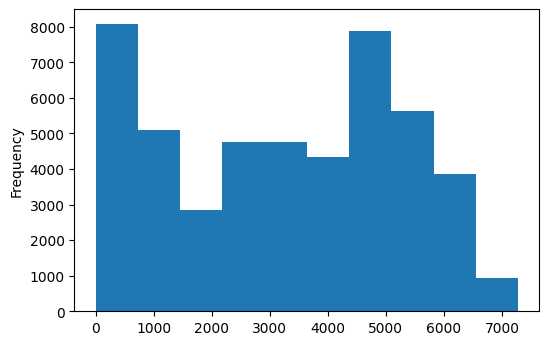

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

In [18]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Throughout this whole timeframe (between 2012-10-02 09:00:00 and 2018-09-30 23:00:00) the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing  each hour — this probably occurs during the night, or when a road is under construction. 
However, about 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

### Traffic Volume: Day vs. Night

To continue out analysis, now we're comparing the daytime and nighttime data. In order to do this, first we'll divide the dataset in 2 parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [19]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

In [27]:

day = i_94.copy()[(i_94['date_time'].dt.hour >=7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)
night = i_94.copy()[(i_94['date_time'].dt.hour <7) | (i_94['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. 

### Traffic Volume: Day vs. Night (II)

Now we're going to look at the histograms of traffic volume during the day and night side-by-side by using a grid chart.

Text(0, 0.5, 'Frequency')

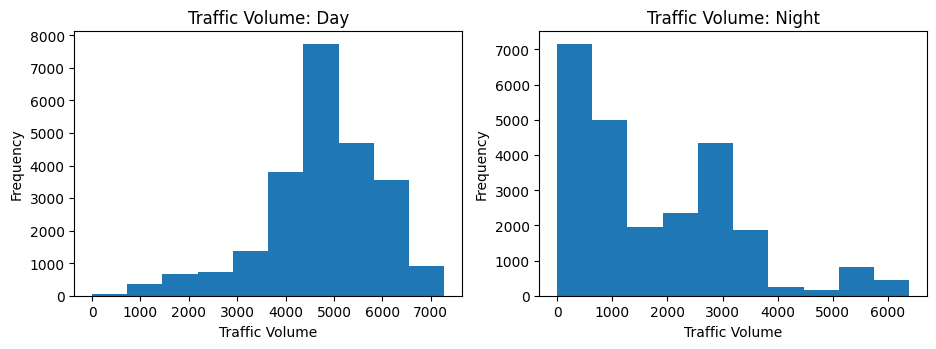

In [28]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [29]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [30]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the results above we can see that the histogram of the daytime traffic data is left skewed - meaning that most of the traffic volume values are high. There are more than 4252 cars passing per each hour (25% of the time there are 4252 cars or less that pass per hour)

Meanwhile if we look at the historgram of the nighttime data, we can say that the histogram is right skewed - meaning that most of the traffic volume data are low. There are 2819 cars or more passing per each hour, 75% of the time. 

Judging from this information we can conclude that most of the traffic is during the day and that the traffic at night is generally light. Having this is mind we'll focus only on the daytime data from now on, in order to find the indicators of heavy traffic. 

### Time Indicators


One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

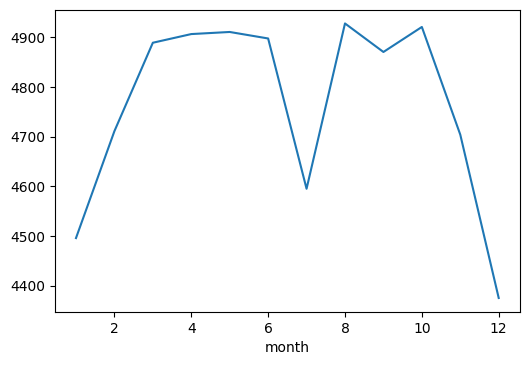

In [32]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. 
Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

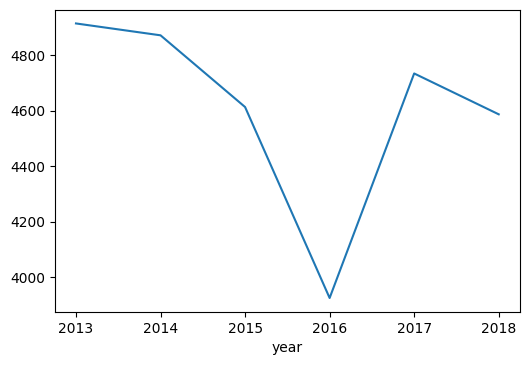

In [36]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

From our analysis up until now, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can expect for each hour of daytime a traffic volume close to 5,000 cars.

### Time Indicators (II)

Now we're going to look at another parameter: day of the week

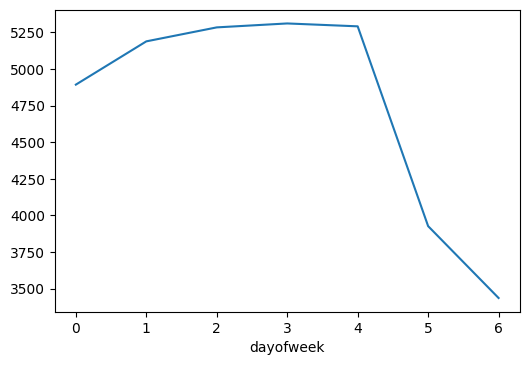

In [38]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
# 0 is Monday, 6 is Sunday
by_dayofweek['traffic_volume'].plot.line() 
plt.show()

Having in mind that the numbers (0-6) represent the days Monday to Sunday in their respective order, we can say that the traffic volume is much higher during the weekdays. 
On the weekend, we have a much lighter traffic with the numbers 5-6 (Saturday, Sunday) having a decent amount of decrease in numbers (around 4000 cars)

### Time Indicators (III)

The last of the time indicators is: time of the day. The weekends would drag down the average values so we'll have a look at averages separately:

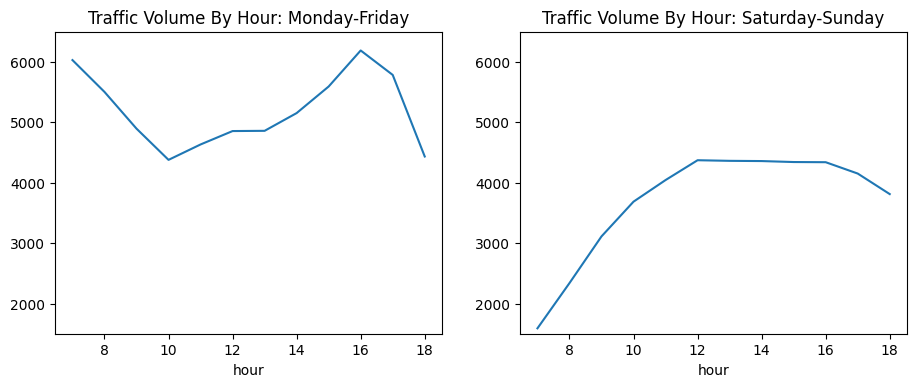

In [49]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek']<=4]
weekend = day.copy()[day['dayofweek']>=5]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday-Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Saturday-Sunday')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends.
The rush hours are around 7:00 and 16:00 — when most people travel from home to work and back. You can see volumes of over 6,000 cars at rush hours.

As a summary of our analysis of the time-related indicators, we've found that:

- The traffic is usually heavier during the warm months (March-October) than the cold months (November-February)
- The traffic is usually heavier during the business days compared to weekends
- On business days, the rush hours are 7:00 and 16:00 - as expected, people during that time commute from home to work and vise versa.

### Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns containing data about the weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [50]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that the `temp` column shows the strongest correlation with a value of just +0.13. The other relevant weather columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show a significant value of correlation with `traffic_volume`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

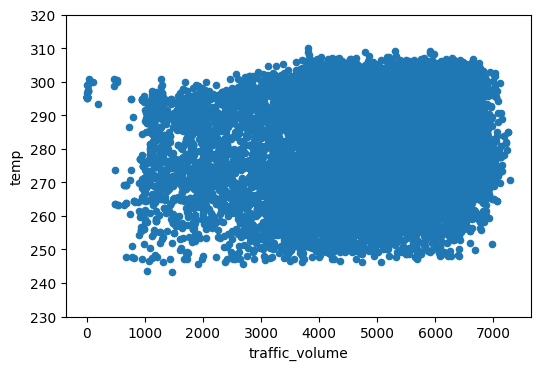

In [53]:
day.plot.scatter('traffic_volume', 'temp')
# two wrong temperatures mess up the y-axis
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

### Weather Types

As a start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.


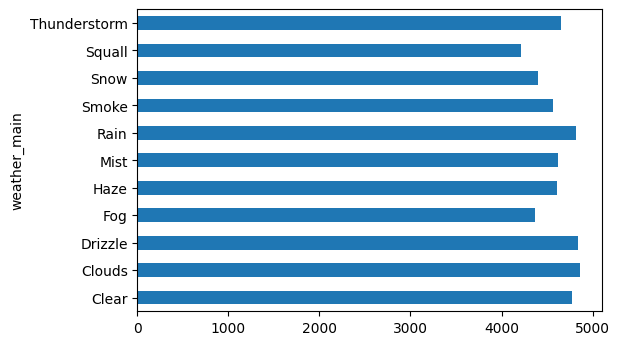

In [55]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes the `weather_main` column not much of an indicator, so we move on to see what `weather_description` column has in store for us since it is a column with a more granular weather classification.

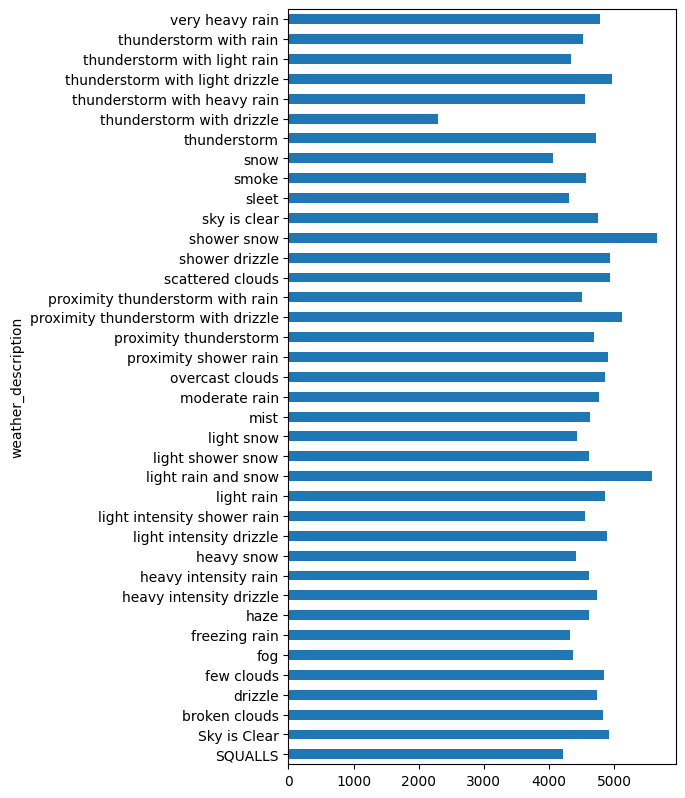

In [59]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()